# **Capstone Project 2 - DATA ANALISIS**

### Nyayu Malia
Northwind -  Customers

## **Question**
General 
1. Bagaimana bisnis berjalan berdasarkan data yang sudah diberikan? Tuliskan asumsi yang diperlukan.
2. Dari data tersebut berapa banyak tabel yang disediakan? Tampilkan ERD database tersebut.
3. Hubungkan database tersebut dengan kernel yang dijadikan olah data.

SQL
1. Tampilkan kolom analisis utama yaitu customers pada Northwind.
2. Setelah di pelajari, tabel customers, orders, orderdetails, products dan categories apakah kelima tabel tersebut dapat digabung? Tampilkan tabel tersebut.

Data Manipulation
1. Apakah terdapat anomali data seperti kesalahan tipe data, missing values, duplikat dan penulisan? Tunjukan penanganan anomali tersebut.
2. Lakukan penambahan data untuk melihat Omzet tahunan perusahaan dan analisis data tersebut untuk mendapat insight dari sisi customers.
3. Perubahan data apakah yang harus dilakukan pada data datetime dan berapa selisih data pemesanan dengan pengiriman? Silahkan tampilkan data rata-rata pengiriman tersebut.
4. Bagaimana penanganan pada data outlier dan duplikat di data yang telah diolah?

Data Visualisation & Statistics
1. Tampilkan 5 pelanggan loyal yang ada pada perusahaan serta berikan insight dan strategi pada data tersebut.
2. Berapakah jumlah customers tiap negara? Tampilkan dan berikan insight terhadap data tersebut.
3. Berapakah jumlah pemesanan produk yang dilakukan customers? Tampilkan dan berikan insight terhadap data tersebut.
4. Berapakah jumlah hasil penjualan pada customers tiap negara? Tampilkan dan berikan insight terhadap data tersebut.
5. Analisis data omzet untuk menemukan strategi yang baik bagi perusahaan.
6. Tampilkan kategori produk terlaris di kalangan customers untuk melakukan strategi yang baik.
7. Analisis statistik dan hubungan pada data omzet untuk menemukan keterangan dan penjelasan deskriptif dari penjualan perusahaan.

## **Informasi Perusahaan**

Sebuah perusahaan bernama Northwind bergerak di bidang supermarket berisi kebutuhan pangan ingin mengetahui gambaran umum tentang customers yang ada pada perusahaan. Terdapat sebuah database yang menunjukan detail data kostumer. Dari database tersebut, perusahaan ingin bisa mendapatkan insight persebaran kostumer mereka sudah seberapa luas negara jangkauan perusahaan untuk dapat menjual produk dengan penjualan(omzet) yang didapat, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk memperluas wilayah penjualan perusahaan.

## **DATABASE**

## **Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 8 tabel, yaitu:
- Region                : Menyimpan informasi provinsi 
- Territories           : Menyimpan informasi wilayah teritorial            
- EmployeeTerritories   : Menyimpan informasi wilayah teritorial karyawan
- Employees             : Menyimpan informasi data karyawan
- Shippers              : Menyimpan informasi jasa pengiriman produk
- Orders                : Menyimpan informasi jual-beli yang dilakukan oleh pelanggan
- OrderDetails          : Menyimpan detail dari setiap pesanan yang dilakukan oleh pelanggan
- Customers             : Menyimpan informasi tentang data pelanggan/customer
- Products              : Menyimpan informasi tentang jenis produk/kendaraan
- Categories            : Menyimpan informasi kategori produk
- Suppliers             : Menyimpan informasi supllier perusahaan
- CustomerCustomerDemo  : Menyimpan informasi tambahan pelanggan
- CustomerDemographics  : Menyimpan informasi tambahan pelanggan

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

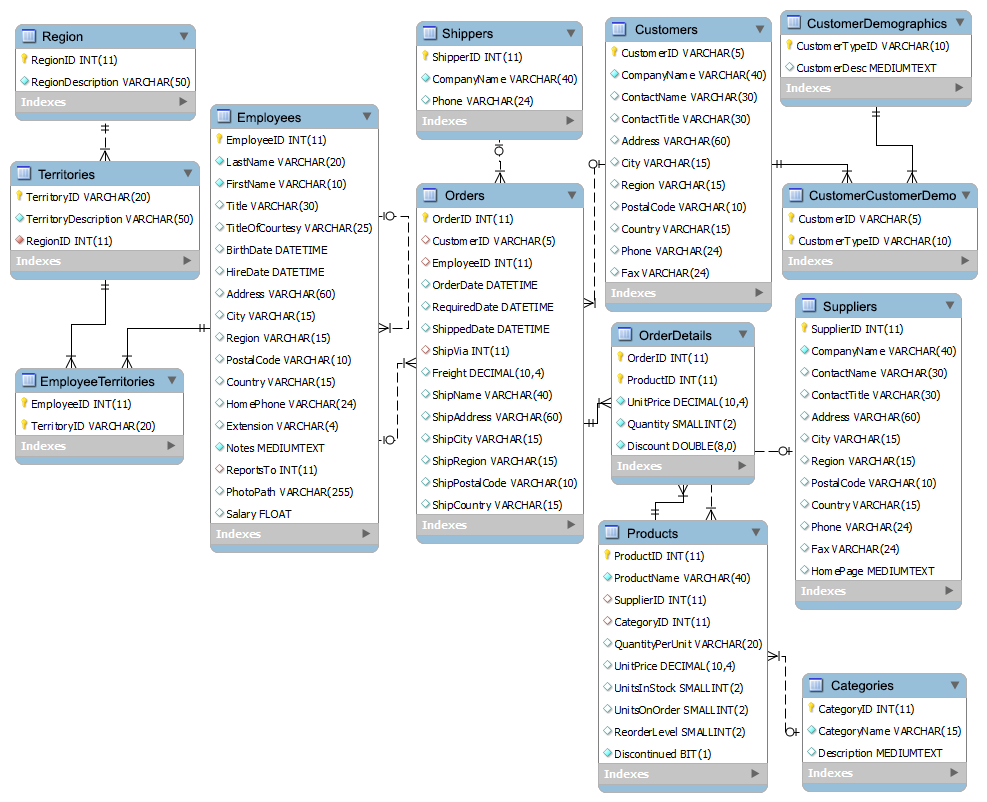

In [183]:
from IPython.display import Image
Image('Northwind ERD.png')

## **HUBUNGKAN DATABASE**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [184]:
#import modules
import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import seaborn as sns
import statsmodels.api as sm
import pylab
import matplotlib.pyplot as plt
import plotly.express as px

In [185]:
#Connect database
mydb = sqlcon.connect(
host = 'localhost',
user = 'root',
passwd = 'Nyayusarah0405',
database = 'northwind'
)

curs = mydb.cursor()

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [186]:
#Query function
def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    data = pd.DataFrame(result, columns=curs.column_names)
    return data

## **Tabel Customers**

Berikut merupakan seluruh tabel customers yang akan menjadi fokus analisis dari database northwind :

In [187]:
dataUtama = sql_table (
    '''
    SELECT * From Customers
    ''')
dataUtama

,CustomerID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitucin 2222,Mxico D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquera,Antonio Moreno,Owner,Mataderos 2312,Mxico D.F.,None,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,Lule,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
...,...,...,...,...,...,...,...,...,...,...,...
88,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,None,90110,Finland,981-443655,981-443655
89,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil,(14) 555-8122,None
90,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,WA,98128,USA,(206) 555-4112,(206) 555-4115
91,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,None,21240,Finland,90-224 8858,90-224 8858


## **Tabel Analisis**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```Costumers```, ```Orders```, ```OrderDetails```,```Products``` dan ```Categories```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja yang diambil. Informasi yang diambil antara lain adalah :
- CustomerID dari tabel customers
- Country dari tabel customers
- CompanyName dari tabel customers
- ContactName dari tabel customers
- ContactTitle dari tabel customers
- Address dari tabel customers
- Region dari tabel customers
- PostalCode dari tabel customers
- Phone dari tabel customers
- Fax dari tabel customers
- ShipCountry dari tabel orders
- OrderID dari tabel orders
- OrderDate dari tabel orders
- ShippedDate dari tabel orders
- ProductID dari tabel orderdetails
- UnitPrice dari tabel orderdetails
- Quantity dari tabel orderdetails
- ProductID dari tabel products
- ProductName dari tabel products
- CategoryID dari tabel categories
- CategoryName dari tabel categories

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

Berikut tabel yang berisikan data yang dibutuhkan untuk menganalisis consumers :

In [188]:
data = sql_table (
    '''
    SELECT a.CustomerID, b.ShipCountry, b.ShipCity, b.OrderID, b.OrderDate, 
    b.ShippedDate, c.ProductID, d.ProductName, c.UnitPrice, c.Quantity, a.Country, 
    a.City, a.CompanyName, a.ContactName, a.ContactTitle, a.Address, a.Region, a.PostalCode, a.Phone, a.fax, e.CategoryID, e.CategoryName
    FROM Customers a
    LEFT JOIN Orders b ON a.CustomerID = b.CustomerID
    LEFT JOIN OrderDetails c ON b.OrderID = c.OrderID
    LEFT JOIN Products d ON c.ProductID = d.ProductID
    LEFT JOIN Categories e ON d.CategoryID = e.CategoryID;
    ''')
data.head()

,CustomerID,ShipCountry,ShipCity,OrderID,OrderDate,ShippedDate,ProductID,ProductName,UnitPrice,Quantity,...,CompanyName,ContactName,ContactTitle,Address,Region,PostalCode,Phone,fax,CategoryID,CategoryName
0,ALFKI,Germany,Berlin,10643.0,1997-08-25,1997-09-02,28.0,Rssle Sauerkraut,45.6000,15.0,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,None,12209,030-0074321,030-0076545,7.0,Produce
1,ALFKI,Germany,Berlin,10643.0,1997-08-25,1997-09-02,39.0,Chartreuse verte,18.0000,21.0,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,None,12209,030-0074321,030-0076545,1.0,Beverages
2,ALFKI,Germany,Berlin,10643.0,1997-08-25,1997-09-02,46.0,Spegesild,12.0000,2.0,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,None,12209,030-0074321,030-0076545,8.0,Seafood
3,ALFKI,Germany,Berlin,10692.0,1997-10-03,1997-10-13,63.0,Vegie-spread,43.9000,20.0,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,None,12209,030-0074321,030-0076545,2.0,Condiments
4,ALFKI,Germany,Berlin,10702.0,1997-10-13,1997-10-21,3.0,Aniseed Syrup,10.0000,6.0,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,None,12209,030-0074321,030-0076545,2.0,Condiments


Penambahan data dilakukan untuk mengetahui rentang hari yang dilakukan pada pengiriman produk untuk melihat seberapa cepat hari rata-rata pengiriman produk kepada customers, sebagai berikut :

In [189]:
data['Shipment'] = data['ShippedDate'] - data['OrderDate']

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```data```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistik dari data tersebut.

# **ANOMALI DATA**

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   CustomerID    2159 non-null   object         
 1   ShipCountry   2155 non-null   object         
 2   ShipCity      2155 non-null   object         
 3   OrderID       2155 non-null   float64        
 4   OrderDate     2155 non-null   datetime64[ns] 
 5   ShippedDate   2082 non-null   datetime64[ns] 
 6   ProductID     2155 non-null   float64        
 7   ProductName   2155 non-null   object         
 8   UnitPrice     2155 non-null   object         
 9   Quantity      2155 non-null   float64        
 10  Country       2157 non-null   object         
 11  City          2157 non-null   object         
 12  CompanyName   2159 non-null   object         
 13  ContactName   2159 non-null   object         
 14  ContactTitle  2159 non-null   object         
 15  Address       2157 no

## **Cek Anomali pada Shipment**

Pada data ini tidak ada data yang dapat menyebabkan error pada analisa maka tidak dianggap sebagai data 'Kotor' dan tidak perlu di tindak lanjuti

In [191]:
data['Shipment'].value_counts()

7 days     271
6 days     241
3 days     187
9 days     184
5 days     177
4 days     176
8 days     174
2 days     149
10 days    129
12 days     45
1 days      43
11 days     34
19 days     23
21 days     20
18 days     19
29 days     19
13 days     17
23 days     15
32 days     15
15 days     14
25 days     13
20 days     13
34 days     13
35 days     12
14 days     12
30 days     11
22 days     11
17 days     11
24 days     11
28 days      8
26 days      5
27 days      4
31 days      3
37 days      2
16 days      1
Name: Shipment, dtype: int64

Pada data ini tidak ada data yang perlu di tinjau lebih lanjut karena sudah siap untuk bisa di analisis.

## **Interpretasi General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2159 baris data dengan total 22 kolom. Setiap kolomnya memiliki tipe data berbeda yaitu object 16 data,float 4 data, datetime 2 data, object 16 data, timedelta 1 data. Sedangkan pada non-null values atau data yang tersedia pada setiap kolomnya dengan melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```Region``` dan ```Fax```. Kedua features tersebut kehilangan lebih dari sekitar 50% data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. **Maka dalam data ini terdapat *missing value* yang harus dibersihkan**

Features yang harus diubah data type yaitu : 

1. UnitPrice = INT 
2. OrderID = INT
3. CategoryID = INT
4. ProductID = INT
5. Quantity = INT
6. Shipment = INT

feature diatas harus dirubah karena tidak sesuai dengan ERD yang sudah ditentukan maka akan dirubah sesuai data type yang sudah ditentukan.

In [192]:
#Cek data kosong
data.isnull().sum()

CustomerID         0
ShipCountry        4
ShipCity           4
OrderID            4
OrderDate          4
ShippedDate       77
ProductID          4
ProductName        4
UnitPrice          4
Quantity           4
Country            2
City               2
CompanyName        0
ContactName        0
ContactTitle       0
Address            2
Region          1333
PostalCode        57
Phone              2
fax              651
CategoryID         4
CategoryName       4
Shipment          77
dtype: int64

## **Missing Values**
Setelah dilihat terdapat beberapa feature yang memang memiliki missing values yaitu Region dan Fax dengan salah satunya memiliki total missing value yang lebih dari 50%. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, setengah dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya banyak informasi. Tentu saja hal tersebut tidak dibenarkan. Untuk mengatasi hal tersebut, salah satu feature tersebut akan dihapus dan tidak akan dimasukkan ke dalam data yang akan dianalisis.

Maka feature fax hampir semua isinya memiliki missing value sebanyak 651. Dari segi angka, bisa diasumsikan bahwa 651 data yang hilang tersebut adalah bagian dari row yang sama yang merupakan data yang betul-betul kosong dari database-nya. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data untuk fax, meskipun total missing valuenya mencapai 651 data (hal tersebut karena 651 data dari 2159 data adalah 30% mungkin akan mempengaruhi informasi secara signifikan tetapi data dalam fax tidak terpakai dalam analisis data jadi tidak berpengaruh secara signifikan)

## **Mengatasi Anomali**
Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Bagian pertama jelas akan dilakukan drop features Region dan Fax. Setelah drop kedua feature tersebut, barulah kemudian missing value dari setiap row-nya dihapus.

In [193]:
#Menghapus kolom region dan fax pada tabel
data.drop(['Region', 'fax'], axis=1, inplace = True)

In [194]:
#Menghapus data missing value
data.dropna(inplace = True)

In [195]:
#Cek missing value kembali
data.isnull().sum()

CustomerID      0
ShipCountry     0
ShipCity        0
OrderID         0
OrderDate       0
ShippedDate     0
ProductID       0
ProductName     0
UnitPrice       0
Quantity        0
Country         0
City            0
CompanyName     0
ContactName     0
ContactTitle    0
Address         0
PostalCode      0
Phone           0
CategoryID      0
CategoryName    0
Shipment        0
dtype: int64

## **Memeriksa kembali Missing Values**

Setelah melakukan proses drop missing value, baik itu drop terhadap features maupun row, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```Region``` serta ```Fax``` sudah tidak ada juga (karena sudah di-drop). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

In [196]:
# cek data kembali
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2158
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   CustomerID    2027 non-null   object         
 1   ShipCountry   2027 non-null   object         
 2   ShipCity      2027 non-null   object         
 3   OrderID       2027 non-null   float64        
 4   OrderDate     2027 non-null   datetime64[ns] 
 5   ShippedDate   2027 non-null   datetime64[ns] 
 6   ProductID     2027 non-null   float64        
 7   ProductName   2027 non-null   object         
 8   UnitPrice     2027 non-null   object         
 9   Quantity      2027 non-null   float64        
 10  Country       2027 non-null   object         
 11  City          2027 non-null   object         
 12  CompanyName   2027 non-null   object         
 13  ContactName   2027 non-null   object         
 14  ContactTitle  2027 non-null   object         
 15  Address       2027 no

## **Mengubah tipe data yang salah**

Tipe data yang sudah dipelejari dan tidak sesuai ERD akan disesuaikan kembali:

In [197]:
#Mengubah data type sesuai dengan ERD
data['UnitPrice'] = pd.to_numeric(data['UnitPrice']).astype(int)
data['OrderID'] = pd.to_numeric(data['OrderID']).astype(int)
data['ProductID'] = pd.to_numeric(data['ProductID']).astype(int)
data['CategoryID'] = pd.to_numeric(data['CategoryID']).astype(int)
data['Quantity'] = pd.to_numeric(data['Quantity']).astype(int)
data['Shipment'] = data['Shipment'].astype(str).str.replace(' days', '').astype(int)

In [198]:
#Cek Data Type 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 0 to 2158
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2027 non-null   object        
 1   ShipCountry   2027 non-null   object        
 2   ShipCity      2027 non-null   object        
 3   OrderID       2027 non-null   int32         
 4   OrderDate     2027 non-null   datetime64[ns]
 5   ShippedDate   2027 non-null   datetime64[ns]
 6   ProductID     2027 non-null   int32         
 7   ProductName   2027 non-null   object        
 8   UnitPrice     2027 non-null   int32         
 9   Quantity      2027 non-null   int32         
 10  Country       2027 non-null   object        
 11  City          2027 non-null   object        
 12  CompanyName   2027 non-null   object        
 13  ContactName   2027 non-null   object        
 14  ContactTitle  2027 non-null   object        
 15  Address       2027 non-null   object  

In [199]:
#Cek data kembali
data.head()

,CustomerID,ShipCountry,ShipCity,OrderID,OrderDate,ShippedDate,ProductID,ProductName,UnitPrice,Quantity,...,City,CompanyName,ContactName,ContactTitle,Address,PostalCode,Phone,CategoryID,CategoryName,Shipment
0,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,28,Rssle Sauerkraut,45,15,...,Berlin,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,7,Produce,8
1,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,39,Chartreuse verte,18,21,...,Berlin,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,1,Beverages,8
2,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,46,Spegesild,12,2,...,Berlin,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,8,Seafood,8
3,ALFKI,Germany,Berlin,10692,1997-10-03,1997-10-13,63,Vegie-spread,43,20,...,Berlin,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,2,Condiments,10
4,ALFKI,Germany,Berlin,10702,1997-10-13,1997-10-21,3,Aniseed Syrup,10,6,...,Berlin,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,2,Condiments,8


## **Cleaned Data Sample**

In [200]:
#Cek Missing Value keseluruhan data
CleanedData = []
for i in data.columns :
    CleanedData.append([
                    i, 
                    data[i].dtype, 
                    len(data),
                    data[i].isna().sum(), 
                    round((data[i].isna().sum()/len(data[i])) * 100,2),
                    data[i].nunique(), 
                    list(data[i].drop_duplicates().sample(2).values)
                    ])

Deskripsi = pd.DataFrame(columns=['Nama Kolom', 'Tipe Data', 'Jumlah Data', 'Missing Value', 'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],data=CleanedData)
Deskripsi

,Nama Kolom,Tipe Data,Jumlah Data,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,CustomerID,object,2027,0,0.0,88,"[RANCH, FOLKO]"
1,ShipCountry,object,2027,0,0.0,20,"[Denmark, USA]"
2,ShipCity,object,2027,0,0.0,69,"[Graz, Kobenhavn]"
3,OrderID,int32,2027,0,0.0,790,"[10467, 10437]"
4,OrderDate,datetime64[ns],2027,0,0.0,474,"[1997-12-05T00:00:00.000000000, 1996-10-31T00:..."
5,ShippedDate,datetime64[ns],2027,0,0.0,382,"[1996-12-09T00:00:00.000000000, 1997-11-11T00:..."
6,ProductID,int32,2027,0,0.0,77,"[2, 70]"
7,ProductName,object,2027,0,0.0,77,"[Raclette Courdavault, Valkoinen suklaa]"
8,UnitPrice,int32,2027,0,0.0,55,"[43, 34]"
9,Quantity,int32,2027,0,0.0,54,"[7, 8]"


**Dari data diatas dapat disimpulkan bahwa data bersih dari data kosong, tipe data sudah benar dan data unik yang tertera pada data secara rampung**

# **FEATURE DATA ANALISIS**

Dari data yang sudah dibersihkan dan diolah menjadi data yang bisa dianalisis maka data akan dipakai untuk melihat transaksi pengiriman ke wilayah mana saja perusahaan mendapat order dari customers serta berapa pendapatan yang didapat dari penjualan tersebut, maka dari data yang tertera nanti akan terlihat wilayah negara dan kota mana yang belum banyak tercapai serta meningkatkan fokus penjualan produk di negara dan kota yang sudah sering melakukan transaksi.

## **Omzet**

Menentukan omzet atau penjualan pada data ini merupakan olah data yang dibutuhkan dalam analisis untuk mengetahui jumlah penjualan yang ada pada perusahaan ```Northwind```

In [201]:
#Menambah kolom baru untuk analisis
data['Omzet'] = data['UnitPrice']* data['Quantity']
data.head()

,CustomerID,ShipCountry,ShipCity,OrderID,OrderDate,ShippedDate,ProductID,ProductName,UnitPrice,Quantity,...,CompanyName,ContactName,ContactTitle,Address,PostalCode,Phone,CategoryID,CategoryName,Shipment,Omzet
0,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,28,Rssle Sauerkraut,45,15,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,7,Produce,8,675
1,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,39,Chartreuse verte,18,21,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,1,Beverages,8,378
2,ALFKI,Germany,Berlin,10643,1997-08-25,1997-09-02,46,Spegesild,12,2,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,8,Seafood,8,24
3,ALFKI,Germany,Berlin,10692,1997-10-03,1997-10-13,63,Vegie-spread,43,20,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,2,Condiments,10,860
4,ALFKI,Germany,Berlin,10702,1997-10-13,1997-10-21,3,Aniseed Syrup,10,6,...,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,12209,030-0074321,2,Condiments,8,60


## **Jumlah Penjualan Selama 3 Tahun**

In [202]:
omzetYear = data[['ShippedDate', 'Quantity' ,'Omzet']].groupby(pd.DatetimeIndex(data['ShippedDate']).year).sum()
omzetYear

,Quantity,Omzet
ShippedDate,,
1996,8301,197765
1997,24587,616810
1998,15547,441679


Pada tabel diatas terlihat pengiriman produk selama 3 tahun :
- 1996 : mempunyai penjualan dengan total 8301 produk dengan hasil penjualan sebesar 197.765 dolar
- 1997 : mempunyai penjualan dengan total 24587 produk dengan hasil penjualan sebesar 616.810 dolar
- 1998 : mempunyai penjualan dengan total 15547 produk dengan hasil penjualan sebesar 441.679 dolar

terlihat bahwa penjualan pada tahun 1997 mempunyai penjualan tertinggi, dari data ini kita harus mengetahui penjualan apa yang sedang tinggi sehingga bisa terlihat produk yang laris terjual akan dikembangkan lebih baik kedepannya agar bisa meningkatkan biaya operasional melakukan efisiensi biaya pembelian stok.

## **Rata-rata pengiriman produk di setiap negara**

In [203]:
shipmentPerformance = data[['Shipment','Country']].groupby(pd.Index(data['Country'])).mean()
shipmentPerformance

,Shipment
Country,
Argentina,9.733333
Austria,7.491525
Belgium,9.732143
Brazil,7.954315
Canada,5.821918
Denmark,7.311111
Finland,5.351852
France,8.372222
Germany,8.283489


In [204]:
shipmentPerformance = data[['Shipment']].mean()
shipmentPerformance

Shipment    8.239763
dtype: float64

**Pada tabel diatas terlihat rata-rata rentang hari setelah order ke pengiriman produk.** 
- Terlihat bahwa yang paling tercepat : Finland dengan rata-rata 5-6 hari produk sudah terkirim
- Terlihat bahwa yang paling lambat : Sweden dengan rata-rata 10-11 hari produk sudah terkirim

dilihat dari data diatas rata-rata rentang hari pengiriman selama 8-9 hari produk sudah terkirim masih terbilang normal.

Kepuasan customers pada pengiriman juga bisa mempengaruhi penjualan dari data yang sudah terlihat di negara **Sweden** perlu ditingkatkan dan ditanggulangi permasalahan apa yang bisa meningkatkan performa pengiriman secara mendetil agar bisa memperluas wilayah penjualan lebih baik.

# **OUTLIERS**

In [205]:
Q1_amount = data['Omzet'].describe()['25%']
Q3_amount = data['Omzet'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = data[(data['Omzet'] < Q1_amount - (1.5 * iqr)) | (data['Omzet']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = data[(data['Omzet'] > Q1_amount - (1.5 * iqr)) & (data['Omzet']< Q3_amount + (1.5 * iqr)) ].index
data.loc[outlier_index].head()

,CustomerID,ShipCountry,ShipCity,OrderID,OrderDate,ShippedDate,ProductID,ProductName,UnitPrice,Quantity,...,CompanyName,ContactName,ContactTitle,Address,PostalCode,Phone,CategoryID,CategoryName,Shipment,Omzet
65,AROUT,UK,Colchester,10953,1998-03-16,1998-03-25,20,Sir Rodney's Marmalade,81,50,...,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,WA1 1DP,(171) 555-7788,3,Confections,9,4050
76,BERGS,Sweden,Lule,10384,1996-12-16,1996-12-20,20,Sir Rodney's Marmalade,64,28,...,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,S-958 22,0921-12 34 65,3,Confections,4,1792
86,BERGS,Sweden,Lule,10524,1997-05-01,1997-05-07,43,Ipoh Coffee,46,60,...,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,S-958 22,0921-12 34 65,1,Beverages,6,2760
98,BERGS,Sweden,Lule,10672,1997-09-17,1997-09-26,38,Cte de Blaye,263,15,...,Berglunds snabbkp,Christina Berglund,Order Administrator,Berguvsvgen 8,S-958 22,0921-12 34 65,1,Beverages,9,3945
140,BLONP,France,Strasbourg,10360,1996-11-22,1996-12-02,29,Thringer Rostbratwurst,99,35,...,Blondesddsl pre et fils,Frdrique Citeaux,Marketing Manager,"24, place Klber",67000,88.60.15.31,6,Meat/Poultry,10,3465


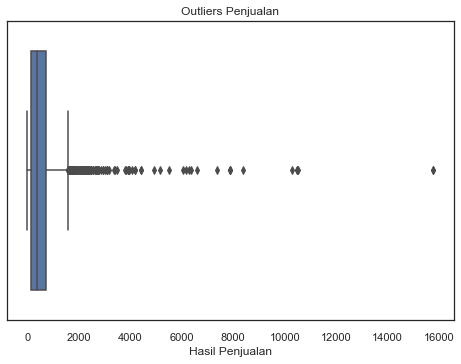

In [206]:
sns.boxplot(data= data, x='Omzet')
plt.title('Outliers Penjualan')
plt.xlabel('Hasil Penjualan')
plt.show()

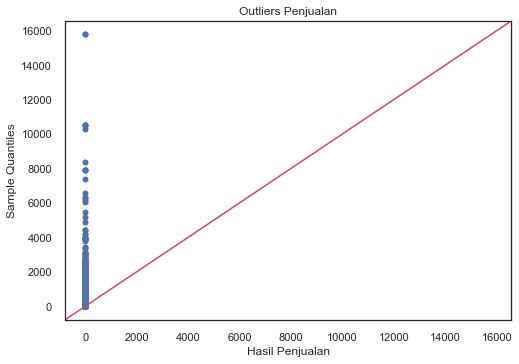

In [207]:
sm.qqplot(data['Omzet'], line ='45')
plt.title('Outliers Penjualan')
plt.xlabel('Hasil Penjualan')
pylab.show()

In [208]:
data['Omzet'].describe()

count     2027.000000
mean       619.760237
std       1017.962916
min          4.000000
25%        151.000000
50%        360.000000
75%        720.000000
max      15780.000000
Name: Omzet, dtype: float64

**Data diatas terlihat positive skewed dengan memiliki outliers yang banyak serta terlihat data omzet mempunyai rata-rata 619 dollar untuk penjualan , memiliki 4 dollar minimal penjualan serta maksimal 15.780 dollar mempunyai titik tengah berada di 360 dolar. Standar deviasi 1017.96 artinya seberapa standard penyimpangan yang ada pada rata-rata atau nilai tengah data tersebut pada 2027 data yang ada. maka data ini bisa menggunakan dengan metode-metode yang lebih peka terhadap adanya outlier atau yang dikenal dengan statistika non parametrik seperti mann whitney, kruskal , wilcoxon.**

## **Mengecek data duplikat**

In [209]:
data[data.duplicated()]

,CustomerID,ShipCountry,ShipCity,OrderID,OrderDate,ShippedDate,ProductID,ProductName,UnitPrice,Quantity,...,CompanyName,ContactName,ContactTitle,Address,PostalCode,Phone,CategoryID,CategoryName,Shipment,Omzet


**Melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada yang dibersihkan pada data tersebut.**

# **VISUALISASI DATA & STATISTIK**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

## **Visualisasi Data**

## Analisis Customers Pada Tiap Negara

In [210]:
fig = px.bar(data['CompanyName'].value_counts().head(),title = 'TOP 5 CUSTOMERS NORTHWIND')
fig.show()

Northwind adalah perusahaan di bidang kebutuhan pangan dan produknya kebutuhan primer maka besar kemungkinan segmentasi customer juga akan lebih condong ke arah perusahaan.Maka dari itu,total 2027 transaksi yang ada pada tahun 1996 sampai 1998, dominasi pembelian bisa jadi pada perusahaan-perusahaan besar yang bergerak di bidang yang sama. Dalam rentan waktu yang disebutkan sebelumnya, save-a-lot Markets memiliki transaksi melebihi 100 transaksi yang bisa dibilang jauh dari perusahaan yang lain dan menjadi pioneer pembelian. Artinya, perusahaan ini adalah pembeli setia northwind yang perlu di layani dengan baik agar bisa terus menjadi customers dan tidak berpindah pembeliannya ke perusahaan lain. Adapun Ernst Handel dan juga QUICK-Stop juga termasuk ke dalam jajaran customers dan memiliki jumlah pembelian yang hampir sama tinggi 2 perusahaan ini perlu dikelola dengan baik agar penjualan bisa lebih meningkat.Sisa dari perusahaan loyal yaitu Berglunds snabbkp dan Frankenversand memiliki pembelian di tingkat yang hampir sama seperti sebelumnya perlu untuk mengetahui kebutuhan mereka lebih lanjut agar bisa membeli lebih banyak. Meski begitu, jumlah transaksi yang dilakukan oleh kedua perusahaan ini masih kalah jauh dari 3 perusahaan sebelumnya.

Dari data diatas sektor di mana terdapat pelanggan yang sangat loyal, berarti terdapat peluang untuk menawarkan barang-barang baru kepada mereka. Perusahaan distributor kebutuhan pangan ini dapat melebihkan promosi dan memberikan special offer kepada kedua pelanggan loyal ini. Artinya, jika ada barang baru yang masuk dalam segmentasi pasar dapat ditawarkan kepada mereka secara langsung. Penawaran ini dilakukan agar kedua customer yang sudah memiliki kepercayaan terhadap perusahaan ini tidak akan berpindah ke lain hati dan keduanya semakin bisa lebih sering melakukan transaksi. membagi customers dalam kelompok pembelian sering sampai tidak sering bisa menjadi acuan pengelolaan customers agar bisa mempertahankan customers tetap pada perusahaan Northwind dan tidak beralih ke perusahaan kompetitor.

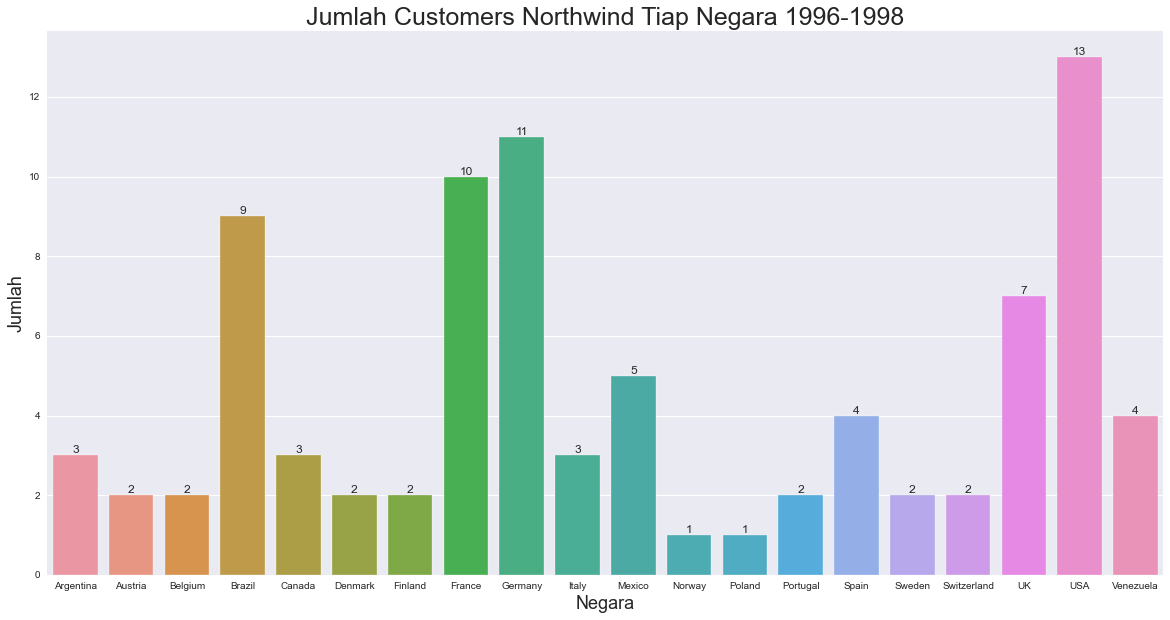

In [211]:
Company = pd.DataFrame(data[['CustomerID', 'Country']].groupby('Country', as_index= False)['CustomerID'].nunique())

plt.style.use('seaborn')
plt.figure(figsize= (20,10))
ax = sns.barplot(data = Company, x='Country',y='CustomerID')
ax.bar_label(ax.containers[0])
plt.title('Jumlah Customers Northwind Tiap Negara 1996-1998', size = 25)
plt.xlabel('Negara', size = 18)
plt.ylabel('Jumlah', size = 18)
plt.show()

Pada data diatas perusahaan ```Northwind``` mempunyai customers dengan analisis sebagai berikut :
- USA dan Germany: Negara dengan customers tertinggi sebesar 13 perusahaan 
- Norway dan Poland : Negara dengan customers terendah sebesar 1 customers

Dari data diatas terlihat jumlah perusahaan tiap negara memiliki variasi yang beragam dari 241 negara yang ada serta 195 negara yang terdaftar pada PBB(Perserikatan Bangsa-Bangsa). Northwind memiliki segmentasi di wilayah Europe hingga Australia dengan total 20 negara yaitu sekitar 9% dari negara yang ada di dunia peningkatan wilayah penjualan bisa di perluas kembali setelah customers yang sudah ada pelayanan dan memenuhi kebutuhannya sudah lebih baik dari sebelumnya jika Northwind memiliki keinginan untuk memperluas wilayah lebih dari 9% customers yang sudah ada.

Customers terbanyak ada di USA dan Germany dengan data ini terlihat makan produk pada Northwind sudah cocok dengan kebutuhan masyarakat di USA maka dari itu customers bisa menjadi distributor untuk northwind di bidang yang sama untuk memperluas wilayah penjualan lebih tersebar rata di negara yang produk kebutuhannya banyak ditemukan di Northwind.Maka dari itu, Northwind perlu untuk memperluas cabang atau membangun store lebih banyak, serta meningkatkan kualitas jasa lebih baik pada shipment yang masih pada rentang 8-9 hari,maupun pelayanan di store karena dapat menambahkan penilaian konsumen di negara ini.Serta mengembangkan produk lebih leluasa karena kebanyakan customers berada di negara tersebut.

Terlihat bahwa Norway dan Poland merupakan customers yang paling rendah di bandingkan negara lainnya maka dari itu peningkatan pada pelayanan jasa dan produk di negara ini membutuhkan kiat yang banyak untuk bisa memasarkan produk Northwind lebih baik agar bisa meningkatkan customers lebih luas di Norway dan Poland, terlepas dari negara paling rendah Northwind juga bisa untuk melayani customers tertinggi ke terendah secara detail untuk bisa memenuhi kebutuhan setiap customers dengan kebutuhan primer yang lebih tepat sasaran dan meningkatkan penjualan lebih banyak.

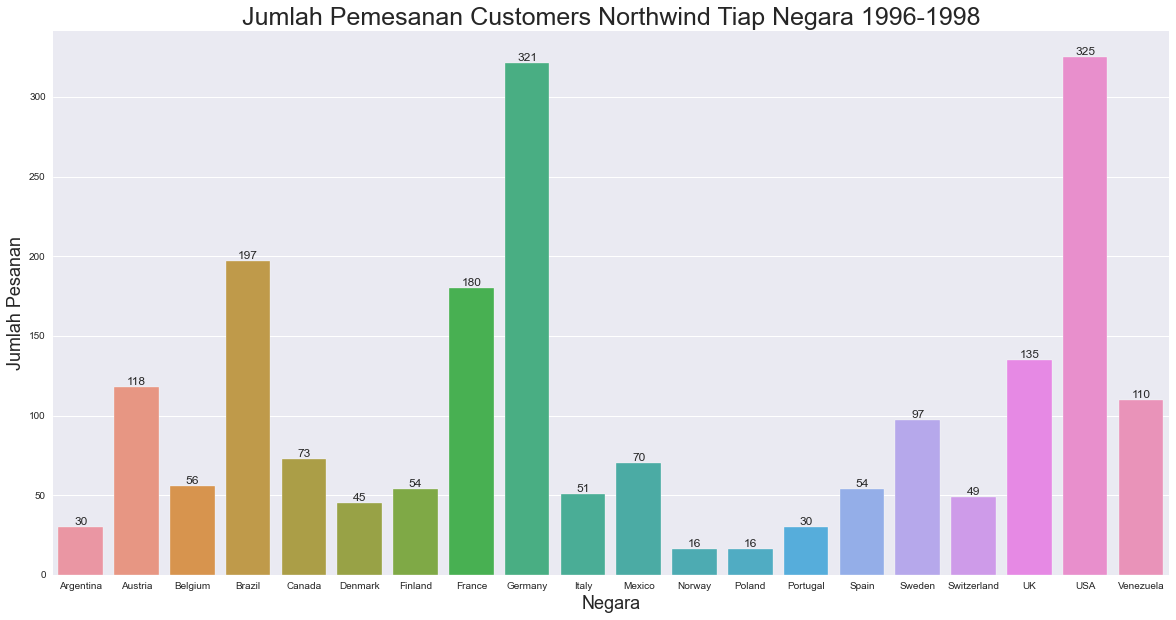

In [212]:
Order = pd.DataFrame(data[['OrderID', 'Country']].groupby('Country', as_index= False)['OrderID'].count())
Order

plt.style.use('seaborn')
plt.figure(figsize= (20,10))
ax = sns.barplot(data = Order, x='Country',y='OrderID')
ax.bar_label(ax.containers[0])
plt.title('Jumlah Pemesanan Customers Northwind Tiap Negara 1996-1998', size = 25)
plt.xlabel('Negara', size = 18)
plt.ylabel('Jumlah Pesanan', size = 18)
plt.show()

Pada data diatas perusahaan ```Northwind``` mempunyai jumlah pemesanan dengan analisis sebagai berikut :
- USA dan Germany: Negara dengan order tertinggi yaitu 321 dan 325 order
- Norway dan Poland : Negara dengan order terendah yaitu 16 order pada keduanya

Terlihat diatas dikarenakan jumlah customers pasti akan mempengaruhi jumlah order maka akan terlihat sama grafiknya hanya saja kita bisa melihat lebih dalam di setiap negara sebenarnya seberapa sering untuk membeli produk yang ada pada Northwind dari angka ini kita bisa mempelajari pemesanan yang paling sering.Maka dari itu,total 2027 transaksi yang ada pada tahun 1996 sampai 1998, dominasi pembelian bisa terlihat dengan detil serta mempunyai perbandingan lebih baik antar negara.

Setelah melihat pemesanan ini kita dapat melihat dan memperkirakan masalah apa yang terjadi serta merumuskan masalah tersebut menjadi peluang bisnis yang dapat diambil pada Northwind untuk bisa meningkatkan jumlah pemesanan sampai ke tangan customers.

strategi yang dapat dilakukan :
- Meningkatkan kekuatan brand pada negara yang mulai berkembang ordernya
- Memperluas target pasar dari negara yang selalu repurchase
- Memberikan treatment lebih pada loyal customer 

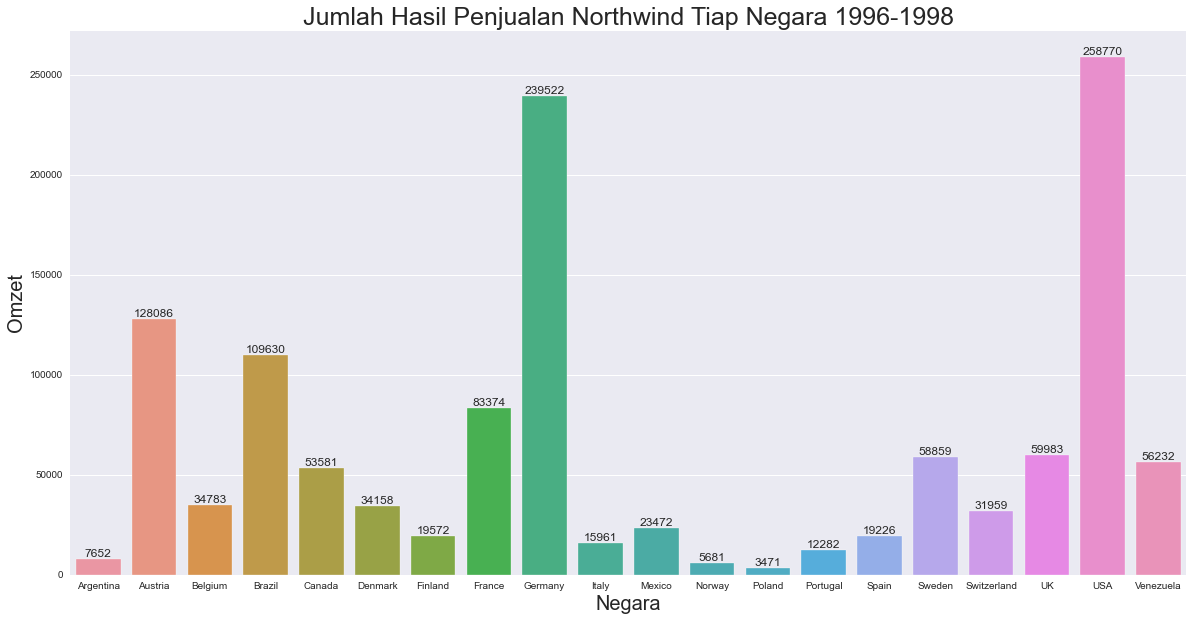

In [213]:
Omzet = pd.DataFrame(data[['Country', 'Omzet']].groupby('Country', as_index= False)['Omzet'].sum())

plt.style.use('seaborn')
plt.figure(figsize= (20,10))
ax = sns.barplot(data = Omzet , x='Country',y='Omzet')
ax.bar_label(ax.containers[0])
plt.title('Jumlah Hasil Penjualan Northwind Tiap Negara 1996-1998', size = 25)
plt.xlabel('Negara', size = 20)
plt.ylabel('Omzet', size = 20)
plt.show()

Pada data diatas perusahaan ```Northwind``` mempunyai jumlah penjualan dengan analisis sebagai berikut :
- USA dan Germany: Negara dengan total penjualan tertinggi yaitu $258.770 dan $239.522 
- Norway dan Poland : Negara dengan total penjualan terendah yaitu $5681 dan $3471 

Dari data ini dapat terlihat penjualan akan berdampak lebih tinggi dan rendah disetiap negara customers, dari data ini bisa menjadi acuan akumulasi untuk pembiayaan serta keuangan Northwind dari sisi finansial agar bisa mendukung pengeluaran dan pemasukan stabil untuk perusahaan dalam melihat forecasting dari sisi finansial terhadap keputusan yang diputuskan oleh manajemen dapat pendukung dari keuangan yang ada pada perusahaan.

dilihat dari total penjualan tiap negara dapat terlihat apakah elastisitas harga dapat mempengaruhi pembelian lalu keputusan harga apakah mempengaruhi dari perbedaan setiap wilayah hingga dapat menurunkan pembelian, pricing akan sangat membantu untuk terlihat dari total penjualan ini karena telah terlihat dari variasi penjualan yang didapat.

strategi yang dapat diterapkan :
- Mmeberikan garansi produk
- Memberikan strategi pembelian bundling agar customer mendapat efisiensi pembelian
- Memulai kerjasama dengan jasa kirim atau membuat sendiri agar bisa efisiensi dari penjualan jasa dan bisa fokus pada produk ataupun sebaliknya

## Analisis Hasil Penjualan Northwind

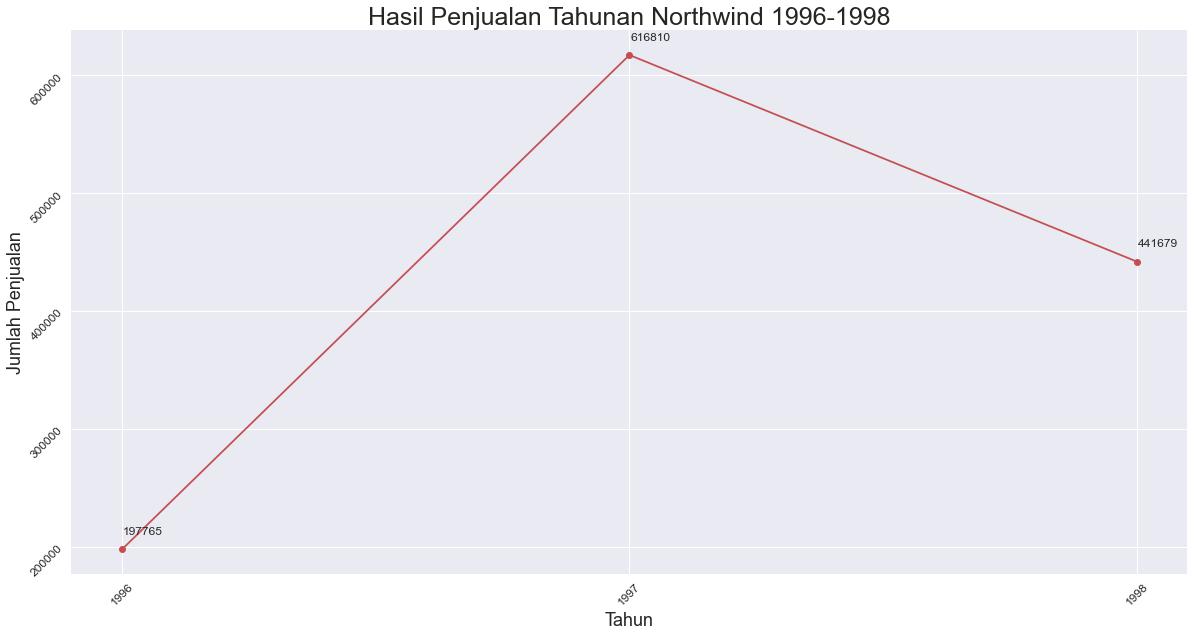

In [214]:
omzetYear = data[['ShippedDate', 'Quantity' ,'Omzet']].groupby(pd.DatetimeIndex(data['ShippedDate']).year).sum()
omzetYear

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(omzetYear.index,omzetYear['Omzet'],'ro-')
plt.title('Hasil Penjualan Tahunan Northwind 1996-1998', size = 25)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Jumlah Penjualan', size = 18)
plt.xticks(omzetYear.index, rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(omzetYear.index, round(omzetYear['Omzet'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

Pada tabel diatas terlihat pengiriman produk selama 3 tahun :
- 1996 :  hasil penjualan sebesar 197.765 dolar
- 1997 :  hasil penjualan sebesar 616.810 dolar
- 1998 :  hasil penjualan sebesar 441.679 dolar

terlihat bahwa penjualan pada tahun 1997 mempunyai penjualan tertinggi, dari data ini kita harus mengetahui penjualan apa yang sedang tinggi sehingga bisa terlihat produk yang laris terjual akan dikembangkan lebih baik kedepannya agar bisa meningkatkan biaya operasional melakukan efisiensi biaya pembelian stok. data ini sebagai acuan untuk data dibawah ini mengapa terjadi penurunan pada data tahunan ini.

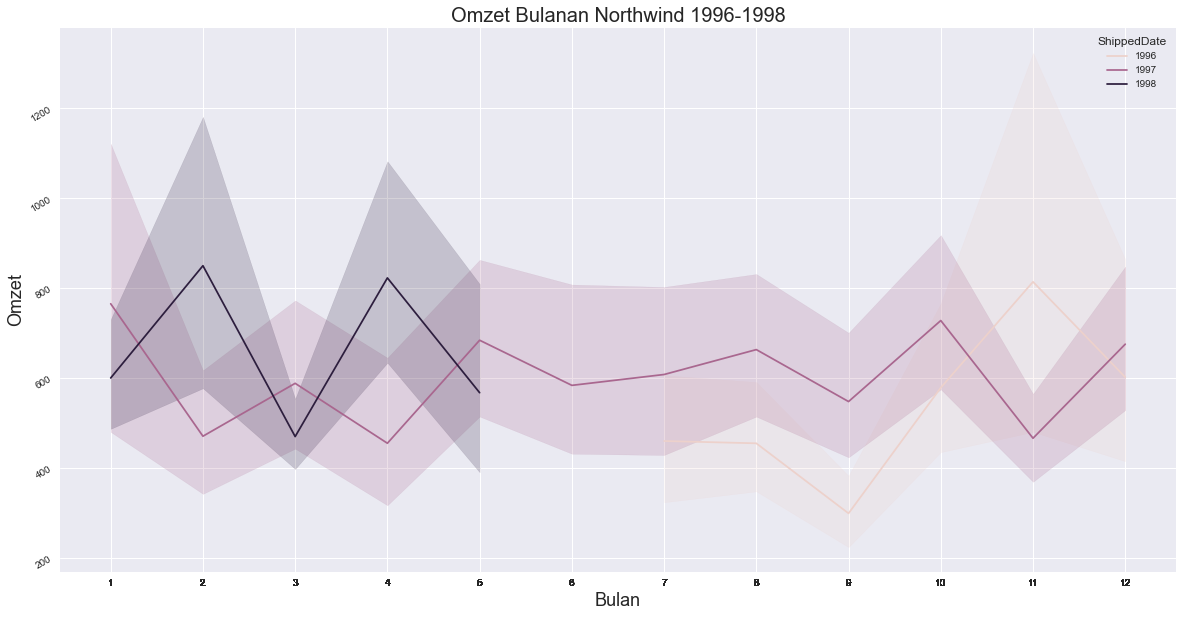

In [215]:
plt.figure(figsize=(20,10))
sns.lineplot(data=data, x=pd.DatetimeIndex(data['ShippedDate']).month, y='Omzet', hue = pd.DatetimeIndex(data['ShippedDate']).year)
plt.title('Omzet Bulanan Northwind 1996-1998', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Omzet', size = 18)
plt.xticks(pd.DatetimeIndex(data['ShippedDate']).month, size = 10)
plt.yticks(rotation = 30, size = 10)
plt.show()

Pada data penjualan bulanan diatas terlihat sebagai berikut :
- tahun 1996 penjualan ada dalam bulan Juli hingga Desember
- tahun 1997 penjualan stabil dalam satu tahun penuh
- tahun 1998 penjualan ada hanya sampai bulan Mei

terlihat bahwa perusahaan mempunyai kekosongan pembelian pada tahun tertentu dan tidak melakukan strategi yang bisa menutupi kekosongan pembelian pada bulan yang seharusnya bisa di optimalkan agar customers bisa membuat pilihan pembelian yang lebih banyak dan bervariasi.

strategi yang harus dilakukan dalam menutupi kekosongan tersebut yaitu:
- Eksperimen dengan penawaran produk baru
- Menciptakan hype di luar musim tertentu untuk produk yang bisa dijual sesuai environment ada tren apa dalam bulan tersebut
- Mengembangkan database selama musim tertentu agar terlihat untuk efisiensi produksi dan pembelian modal
- Evaluasi dan Analisa trend pasar yang seharusnya di optimalkan pada saat penjualan naik agar tidak terjadi penurunan pada penjualan
- Membuat promosi yang berdasarkan dengan efisien dan efektif serta return ke perusahaan yang baik
- Mengutamakan kualitas dan inovasi produk yang sudah ada

## Penjualan Kategori Produk Terlaris

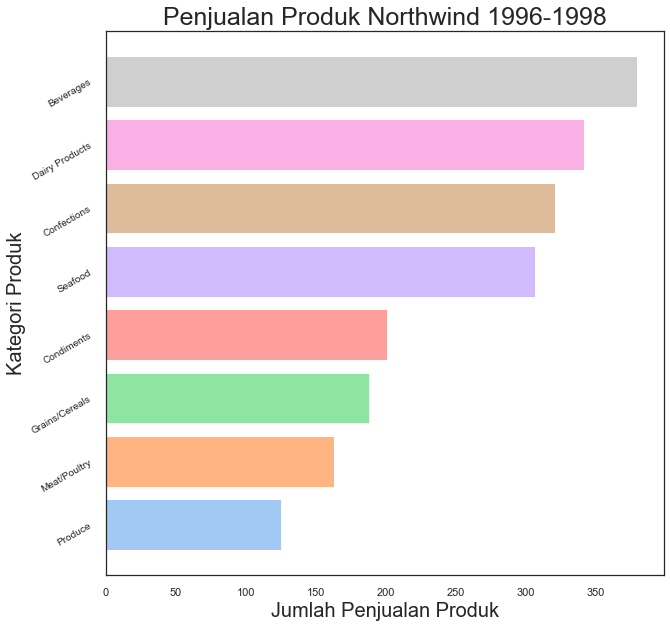

In [216]:
Produk = data[['CategoryName', 'OrderDate']].groupby(['CategoryName']).count().sort_values('OrderDate')
x = Produk.index
y = Produk['OrderDate']

plt.style.use('seaborn')
sns.set( style = "white" )
plt.figure(figsize = (10,10))
plt.barh(x,y, color = sns.color_palette('pastel'))
plt.title('Penjualan Produk Northwind 1996-1998', size = 25)
plt.xlabel('Jumlah Penjualan Produk', size = 20)
plt.ylabel('Kategori Produk', size = 20)
plt.yticks(rotation = 30, size = 10)
plt.show()

Terlihat data diatas merupakan produk yang mempunyai data produk dalam penjualan yaitu :
- Baverages sebagai produk terlaris dengan pemesanan tertinggi
- Produce sebagai produk tidak laris dengan pemesanan terendah

Dari data ini kita dapat menyimpulkan bahwa 3 produk teratas dapat di kembangkan dengan baik sesuai penjualan yang sudah ada serta bisa menentukan mana produk yang harus dikelola dengan baik dan dikembangkan oleh perusahaan, dengan ada data ini dapat mengefisiensikan pembiayaan dan mengoptimalkan produksi dan bisa stabil dalam penjualan serta kepuasan customers bisa meningkat dengan adanya produk yang bisa terpenuhi serta kualitas apalagi dengan harga yang bisa terjangkau dari strategi yang bisa diterapkan oleh perusahaan setelah analisis ini dapat diterapkan

strategi produk yang dapat diterapkan yaitu :
- Membuat inovasi produk yang mempunyai penjualan tertinggi
- Melakukan riset kebutuhan pasar
- Mengembangkan produk yang kurang laris untuk dapat dijual lebih tinggi

## **Statistik**

In [217]:
from scipy.stats import kstest

norm, pval = kstest(data['Omzet'],'norm')

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 5%)
DATA TIDAK BERDISTRIBUSI NORMAL


In [218]:
from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    data[data['CategoryName'] == 'Baverages']['Omzet'],
    data[data['CategoryName'] == 'Dairy Products']['Omzet'],
    data[data['CategoryName'] == 'Confections']['Omzet'],
    data[data['CategoryName'] == 'Seafood']['Omzet'],
    data[data['CategoryName'] == 'Condiments']['Omzet'],
    data[data['CategoryName'] == 'Grains/Cereals']['Omzet'],
    data[data['CategoryName'] == 'Meat/Poultry']['Omzet'],
    data[data['CategoryName'] == 'Produce']['Omzet']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Omzet pada setiap kategori produk yang ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Omzet pada setiap kategori produk Yang Ada')

Gagal Tolak H0 Karena P-Value (0.0 > 5%)
Tidak Terdapat Perbedaan Nilai Median Omzet pada setiap kategori produk Yang Ada


In [219]:
data.groupby(['CategoryName']).median()

,OrderID,ProductID,UnitPrice,Quantity,CategoryID,Shipment,Omzet
CategoryName,,,,,,,
Beverages,10662.0,38.0,15.0,20.0,1.0,7.0,276.0
Condiments,10642.0,61.0,19.0,20.0,2.0,7.0,375.0
Confections,10642.0,26.0,14.0,20.0,3.0,7.0,340.0
Dairy Products,10611.5,59.0,27.0,20.0,4.0,7.0,445.0
Grains/Cereals,10654.5,56.0,19.0,20.0,5.0,7.0,380.0
Meat/Poultry,10600.0,53.0,31.0,18.0,6.0,7.0,504.0
Produce,10634.0,28.0,36.0,18.0,7.0,6.0,530.0
Seafood,10675.0,37.0,15.0,20.0,8.0,7.0,288.0


**Dari hasil statistik diatas dapat disimpulkan :**

Data yang di analisis menghasilkan bahwa data yang diolah tidak berdistribusi normal serta Median tidak terdapat perbedaan nilai di setiap kategori uji ini dilakukan untuk hasil olah statistik untuk melihat perbedaan signifikan secara statistik antara dua atau lebih kelompok variabel independen pada variabel dependen yang berskala data yang ada.

## **Hubungan Harga Jual dan Penjualan**

<AxesSubplot:>

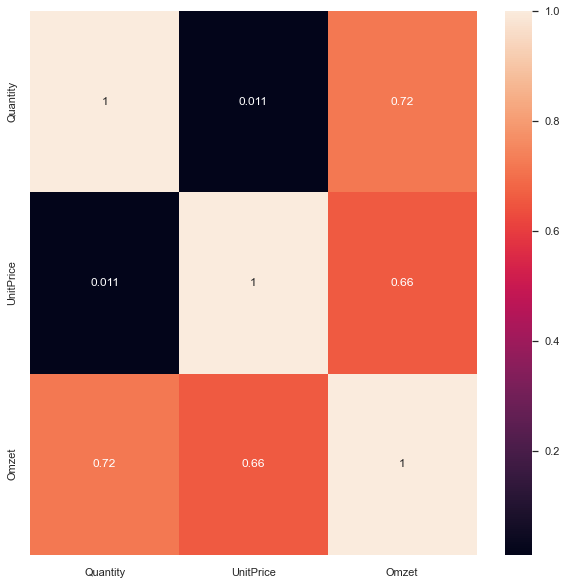

In [220]:
plt.figure(figsize=(10,10))
sns.heatmap(data[['Quantity','UnitPrice', 'Omzet']].corr('spearman'), annot=True)

**Dari data korelasi diatas dapat disimpulkan :**

1. Hubungan pada Omzet dan Quantity memiliki hubungan yang sangat kuat antar variabel sebesar 0,72
2. Hubungan Unit Price dan Quantity memiliki hubungan yang kurang berarti antar variabel sebesar 0,011
3. Hubungan Omzet dan Unit Price memiliki hubungan yang kuat antar variabel sebesar 0,66